# Business Problem 2

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

import warnings

# Filter out specific warning categories
warnings.filterwarnings("ignore", category=UserWarning)

# Q1 Clean The Data

In [28]:
raw_data = pd.read_csv('purchase_history.csv')
raw_data.head(4)

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,CLV,Ad Spend
0,1001,150.0,75.0,200.0,100.0,175.0,75.0,2625.0,2625.00,2625.00,2625.00,13125,2625.00
1,1002,25.0,50.0,150.0,200.0,175.0,200.0,1875.0,1875.00,1875.00,1875.00,9375,1875.00
2,1003,75.0,150.0,0.0,25.0,75.0,25.0,1031.2,1031.20,1031.20,1031.20,5156,1031.20
3,1004,200.0,200.0,25.0,100.0,75.0,150.0,2351.2,1645.84,1645.84,1645.84,11756,1645.84


In [29]:
data = raw_data.dropna()

# Q.2 Reviewing the data types

In [30]:
data.shape

(100, 13)

In [31]:
data.dtypes

CUST_ID       int64
MONTH_1     float64
MONTH_2     float64
MONTH_3     float64
MONTH_4     float64
MONTH_5     float64
MONTH_6     float64
MONTH_7     float64
MONTH_8     float64
MONTH_9     float64
MONTH_10    float64
CLV           int64
Ad Spend    float64
dtype: object

# Q.3 Removing irrelevant columns

# I am overwriting the dataframe but i am not using it agin so it is ok

# making a dataframe without the cust id it isn't necessary

In [32]:
data = data.drop(['CUST_ID'],axis=1)
data.head(4)

,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,CLV,Ad Spend
0,150.0,75.0,200.0,100.0,175.0,75.0,2625.0,2625.00,2625.00,2625.00,13125,2625.00
1,25.0,50.0,150.0,200.0,175.0,200.0,1875.0,1875.00,1875.00,1875.00,9375,1875.00
2,75.0,150.0,0.0,25.0,75.0,25.0,1031.2,1031.20,1031.20,1031.20,5156,1031.20
3,200.0,200.0,25.0,100.0,75.0,150.0,2351.2,1645.84,1645.84,1645.84,11756,1645.84


# making a dataframe without the ad spend 

In [33]:
no_Ad_data = data.drop(['Ad Spend'],axis=1)
no_Ad_data.head(4)

,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,CLV
0,150.0,75.0,200.0,100.0,175.0,75.0,2625.0,2625.00,2625.00,2625.00,13125
1,25.0,50.0,150.0,200.0,175.0,200.0,1875.0,1875.00,1875.00,1875.00,9375
2,75.0,150.0,0.0,25.0,75.0,25.0,1031.2,1031.20,1031.20,1031.20,5156
3,200.0,200.0,25.0,100.0,75.0,150.0,2351.2,1645.84,1645.84,1645.84,11756


# Q.4 Showing the months highly correlate with the CLV

In [34]:
# the correlation for months to clv using the corr method 
# I am running this on the dataframe with no ad spend because i dont want to see that column
no_Ad_data.corr()['CLV'].nlargest(11)

CLV         1.000000
MONTH_9     0.700048
MONTH_7     0.625479
MONTH_10    0.594467
MONTH_8     0.354934
MONTH_2     0.156769
MONTH_4     0.141935
MONTH_1     0.044732
MONTH_5     0.024152
MONTH_3    -0.008345
MONTH_6    -0.049554
Name: CLV, dtype: float64

# showing a line graph of the 6 highest correlated months

<Axes: >

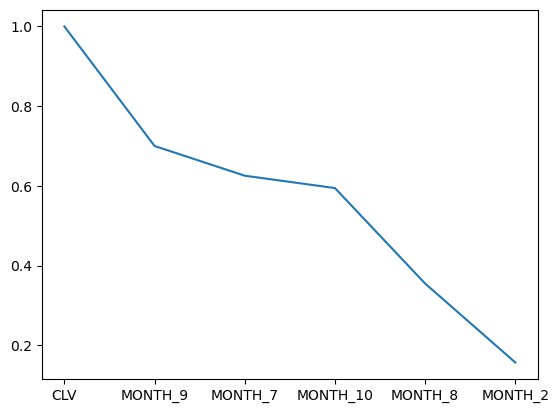

In [35]:
no_Ad_data.corr()['CLV'].nlargest(6).plot()

# Q.5 Showing the months highly correlate with the Ad Spend

In [36]:
# the correlation for months to Ad Spend using the corr method 
# I am running this on the dataframe with cust id spend because i dont want to see that column just the 'variables'
data.corr()['Ad Spend'].nlargest(11)

Ad Spend    1.000000
MONTH_9     0.875176
CLV         0.643211
MONTH_7     0.514088
MONTH_10    0.471905
MONTH_8     0.429864
MONTH_1     0.362963
MONTH_6     0.206858
MONTH_3     0.191350
MONTH_4     0.113878
MONTH_5     0.024077
Name: Ad Spend, dtype: float64

# showing a line graph of the 6 highest correlated variables

<Axes: >

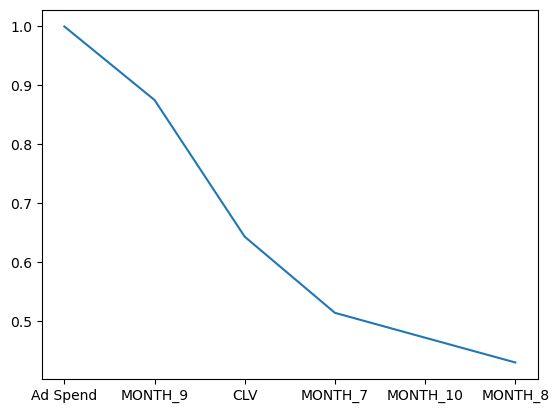

In [37]:
data.corr()['Ad Spend'].nlargest(6).plot()

# Q.6 Create a plot(s) to show the regression of months to Customer’s Lifetime Value.

# pairplot of the months to clv 

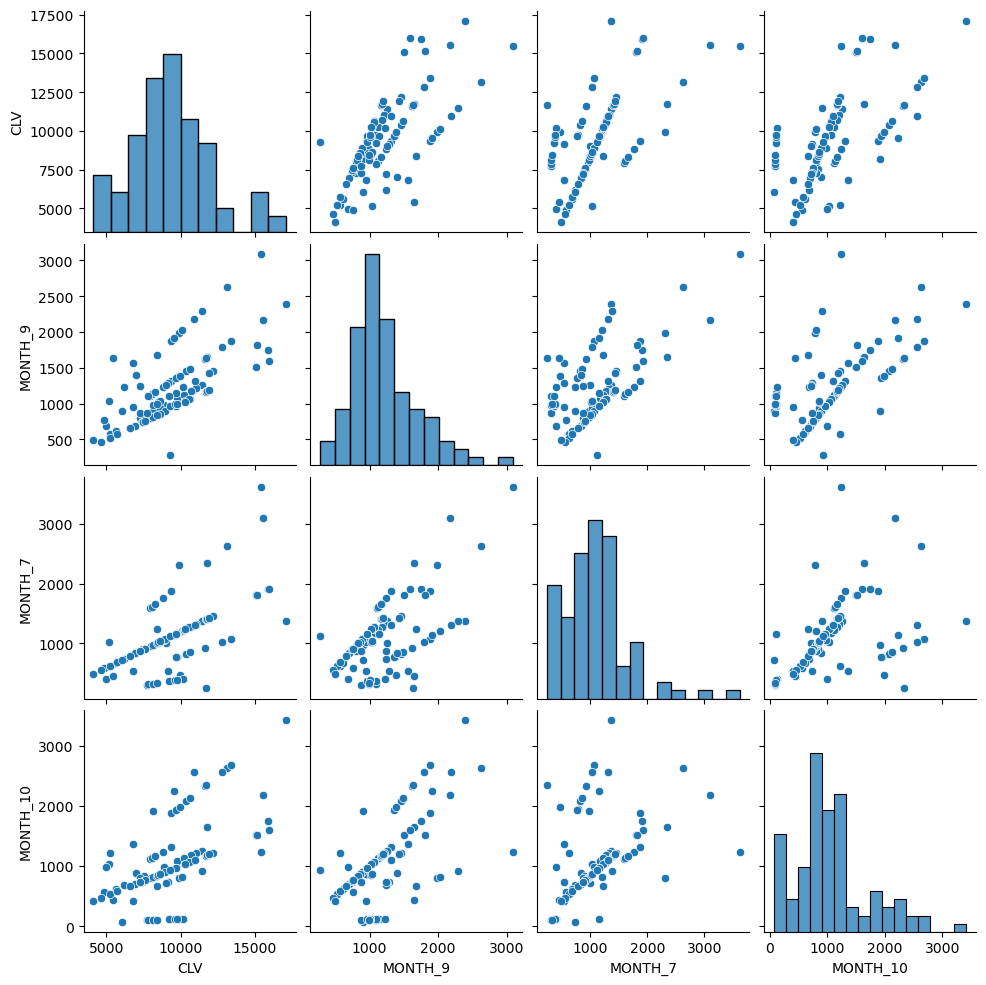

In [38]:
sns.pairplot(data[['CLV','MONTH_9','MONTH_7','MONTH_10']])

# a scatter plot that shows the correlation with the highest month and the clv

<Axes: xlabel='CLV', ylabel='MONTH_9'>

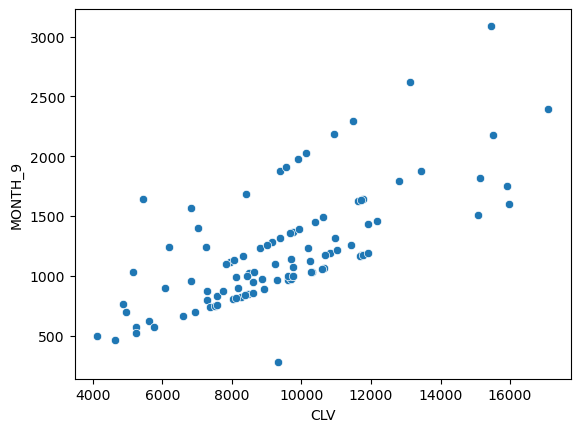

In [39]:
sns.scatterplot(data=data,x='CLV',y='MONTH_9')

# an  implot that shows the correlation with the highest month and the clv

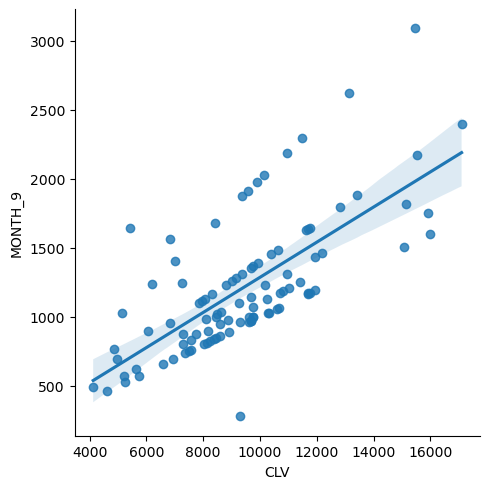

In [40]:
sns.lmplot(x='CLV',y='MONTH_9',data=data)

# an implot that shows the correlation with the lowest positive month and the clv

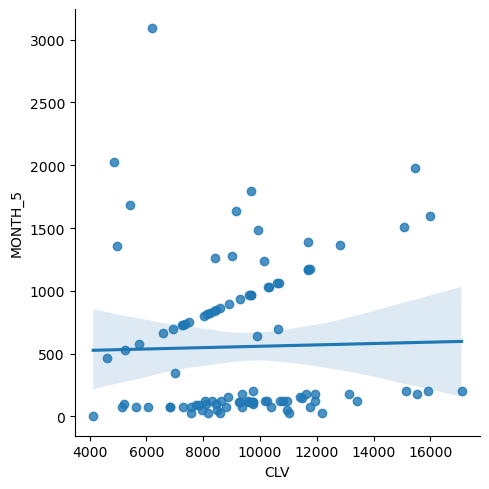

In [41]:
sns.lmplot(x='CLV',y='MONTH_5',data=data)

# Q.7 building model

# dropping columns and setting up predictors and targets i am dropping the really low months and keeping 2 of the lower months for better results

In [42]:
new_data = data.drop(['CLV','MONTH_6','MONTH_3','MONTH_5','MONTH_1','Ad Spend'],axis=1)
predictors = new_data
targets = data['CLV']
predictors.head(5)

,MONTH_2,MONTH_4,MONTH_7,MONTH_8,MONTH_9,MONTH_10
0,75.0,100.0,2625.0,2625.00,2625.00,2625.00
1,50.0,200.0,1875.0,1875.00,1875.00,1875.00
2,150.0,25.0,1031.2,1031.20,1031.20,1031.20
3,200.0,100.0,2351.2,1645.84,1645.84,1645.84
4,200.0,75.0,3105.0,2173.50,2173.50,2173.50


# setting up the training and test data the test size is 20% of the data

In [60]:
pred_train,pred_test,tar_train, tar_test = train_test_split(predictors, targets,test_size = .2)
print('Predictor -Training ', pred_train.shape, 'Predictor - testing', pred_test.shape)

Predictor -Training  (80, 6) Predictor - testing (20, 6)


# Q.7 this is showing the accuracy of the model

In [61]:
model = LinearRegression()
# Fit the model to the training data, where 'pred_train' represents the feature data, and 'tar_train' represents the target data.
model.fit(pred_train,tar_train)
print('Coefficients: \n',model.coef_)
print('Intercept:',model.intercept_)

# testing on test data
predictions = model.predict(pred_test)
predictions
print('Accuracy of the model:',sklearn.metrics.r2_score(tar_test,predictions).round(2))

Coefficients: 
 [ 1.58793646 -0.91177122  1.07846779  0.25498263  3.01625137  0.27701758]
Intercept: 3618.199664530818
Accuracy of the model: 0.51


# Q.8 predicting the new customer’s CLV for different spending in each month of purchases.

In [45]:
new_data = np.array([1000,0,0,0,0,0]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 1: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 1: € 5125.69


In [46]:
new_data = np.array([0,1000,0,0,0,0]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 2: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 2: € 2159.62


In [47]:
new_data = np.array([0,0,1000,0,0,0]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 3: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 3: € 4562.18


In [48]:
new_data = np.array([0,0,0,1000,0,0]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 4: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 4: € 4760.58


In [49]:
new_data = np.array([0,0,0,0,1000,0]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 5: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 5: € 5351.72


In [50]:
new_data = np.array([0,0,0,0,0,1000]).reshape(1,-1)
new_pred = model.predict(new_data)
print('The customer lifetime value for a new customer who bought only in month 6: €', new_pred[0].round(2))

The customer lifetime value for a new customer who bought only in month 6: € 4113.91


# Q.9 Plot any graph (or add extra code) that would help Amazine Ltd management interpret customer purchase data 

# the average purchase amount for each month

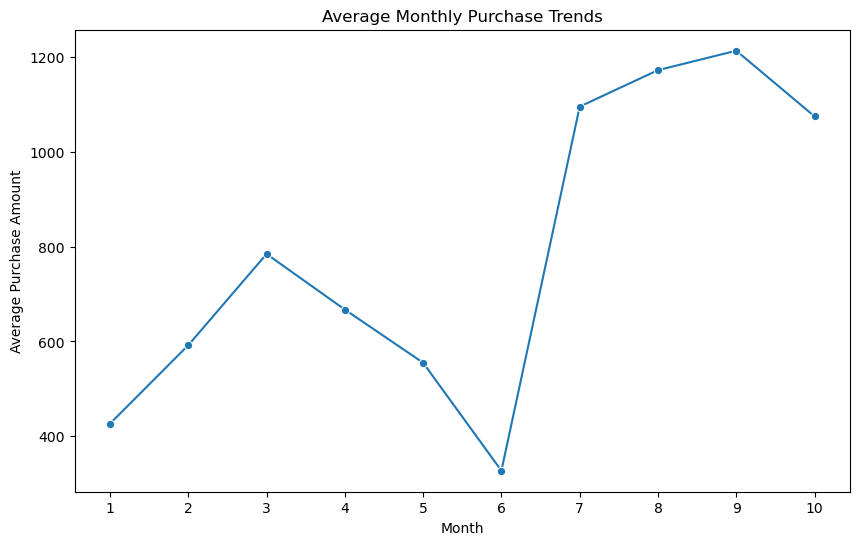

In [51]:
monthly_data = data[['MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10']]
monthly_avg = monthly_data.mean()

# Plot the Monthly Purchase Trends using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, marker='o')
plt.title('Average Monthly Purchase Trends')
plt.xlabel('Month')
plt.ylabel('Average Purchase Amount')
plt.xticks(range(10), range(1, 11))
plt.show()


<Figure size 1200x600 with 0 Axes>

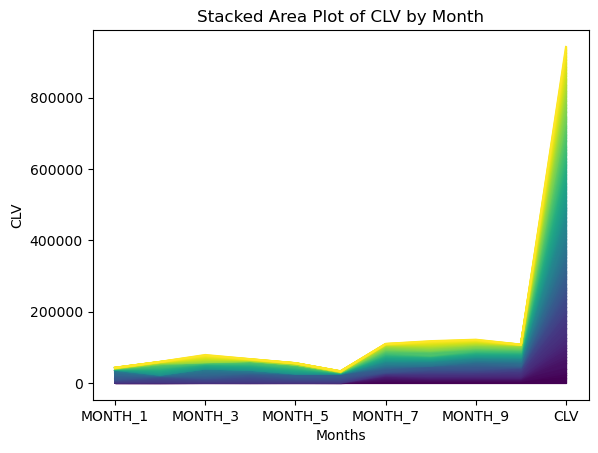

In [52]:
# Transpose the DataFrame to have months as rows 
df = data.iloc[:, :-1].T

# Create a stacked area plot without a legend

plt.figure(figsize=(12, 6))
ax = df.plot(kind='area', stacked=True, colormap='viridis')
plt.title('Stacked Area Plot of CLV by Month')
plt.xlabel('Months')
plt.ylabel('CLV')
ax.get_legend().remove()
plt.show()